# Programming Assignment
**Authors: Radwan Ganem, Bayan Kassem, Yosef Shawah** 


**Implementation of a simulation of a web service. Requests arrive at Poisson Intervals, e.g., each
millisecond there is a small chance for a request to arrive.**

**In this experement we will evaluate the impact of different queue algorithms on the
performance, the algorithms are: TailDrop Queue, HeadDrop Queue, RED Queue**


**First:** we will use a small size for the queues of value 10, arrival rate is 0.1 requests per ms

Implementation of the Queues

In [67]:
import random
import time

class TailDrop:
    def __init__(self):
        self.queue = []
        self.max_size = 10

    def enqueue(self, request):
        if len(self.queue) < self.max_size:
            self.queue.append(request)
        else:
            print("maxed queue, request dropped!")

    def dequeue(self):
        if not self.is_empty():
            return self.queue.pop(0)
        return None

    def is_empty(self):
        return len(self.queue) == 0

    def set_max_size(self,size):
      self.max_size = size


class HeadDrop:
    def __init__(self):
        self.queue = []
        self.max_size = 10

    def enqueue(self, request):
        if len(self.queue) < self.max_size:
            self.queue.append(request)
        else:
            self.queue.pop(0)
            self.queue.append(request)
            print("maxed queue, oldest request dropped!")

    def dequeue(self):
        if not self.is_empty():
            return self.queue.pop()
        return None

    def is_empty(self):
        return len(self.queue) == 0
    def set_max_size(self,size):
      self.max_size = size

class RED:
    def __init__(self):
        self.queue = []
        self.max_size = 10
        self.min_threshold = 3
        self.max_threshold = 8
        self.drop_probability = 0.5

    def enqueue(self, request):
        if len(self.queue) > self.max_size:
            print("maxed queue request dropped!")
        else:
            queue_len = len(self.queue)
            if queue_len < self.min_threshold:
                self.queue.append(request)
            elif queue_len >= self.max_threshold:
                print("request dropped by len bigger the threashold")
                return
            else:
                # drop requests randomly by probability
                if random.uniform(0, 1) < self.drop_probability:
                    print("request dropped by probability!")
                else:
                    self.queue.append(request)
    def set_max_size(self,size):
      self.max_size = size
    def dequeue(self):
        if not self.is_empty():
            return self.queue.pop(0)
        return None

    def is_empty(self):
        return len(self.queue) == 0


Request implementation

In [68]:
class Request:
    def __init__(self, arrived_time):
        self.arrived_time = arrived_time
        self.processing_time = random.uniform(0.001, 0.1)  # Randomly generated processing time between 1 ms to 100 ms
        self.fixed_deadline = 1.0  #Fixed deadline (e.g., 2 seconds)
        self.completion_status = False

def GetRequest(arrived_time):
    return Request(arrived_time)


**Simulation of Web Service Implementation**

In [69]:
def Simulation(requests_arrival_rate, queue, time_to_run):
    successful_requests = 0
    requests_num = 0
    simulation_start_time = 0.0

    while simulation_start_time < time_to_run:
        if random.uniform(0, 1) < requests_arrival_rate:
            new_request = GetRequest(time.time())
            queue.enqueue(new_request)
            requests_num += 1

        # randomly ingnore and get another request or process the request
        if not queue.is_empty() and random.uniform(0, 1) > 0.3:
                current_request = queue.dequeue()
                time.sleep(current_request.processing_time)  # process request

                if time.time() <= current_request.arrived_time + current_request.fixed_deadline:
                    current_request.completed = True
                    successful_requests += 1
                else:
                    print("request failed to process before the deadline!")

        simulation_start_time += 0.001

    success_rate = successful_requests / requests_num if requests_num > 0 else 0
    return success_rate

Running the simulation with TailDrop Queue


In [70]:
requests_arrival_rate = 0.1
time_to_run = 1.0

queue = TailDrop()

tail_drop_success_rate1 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {tail_drop_success_rate1:.2%}")

Success Rate: 100.00%


Running the simulation with HeadDrop Queue


In [71]:
requests_arrival_rate = 0.1
time_to_run = 1.0

queue = HeadDrop()

head_drop_success_rate1 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {head_drop_success_rate1:.2%}")

Success Rate: 100.00%


Running the simulation with Red Queue

In [72]:
requests_arrival_rate = 0.1
time_to_run = 1.0

queue = RED()

red_success_rate1 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {red_success_rate1:.2%}")

Success Rate: 100.00%


**Displaying the Graph**

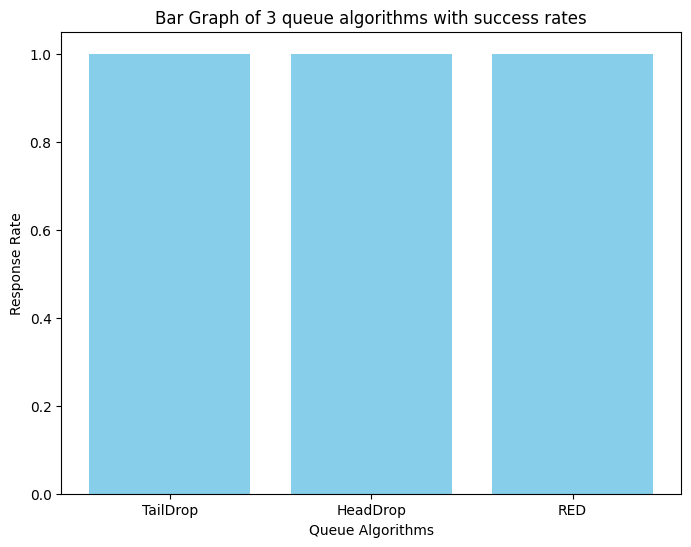

In [73]:
import matplotlib.pyplot as plt

# Define data for the bar graph (three points and their corresponding values)
points = ['TailDrop', 'HeadDrop', 'RED']
values = [tail_drop_success_rate1, head_drop_success_rate1, red_success_rate1]  # Corresponding values for each point

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

# Create the bar chart
plt.bar(points, values, color='skyblue')

# Add labels and title
plt.xlabel('Queue Algorithms')  # Label for x-axis
plt.ylabel('Response Rate')  # Label for y-axis
plt.title('Bar Graph of 3 queue algorithms with success rates')  # Title of the graph

# Display the bar graph
plt.show()

**Now we want to check the diffrence with more request arrived per ms**

Running the simulation with TailDrop Queue


In [74]:
requests_arrival_rate = 0.9
time_to_run = 1.0

queue = TailDrop()

tail_drop_success_rate2 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {tail_drop_success_rate2:.2%}")

maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queue, request dropped!
maxed queu

Running the simulation with HeadDrop Queue

In [75]:
requests_arrival_rate = 0.9
time_to_run = 1.0

queue = HeadDrop()

head_drop_success_rate2 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {head_drop_success_rate2:.2%}")

maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
m

Running the simulation with Red Queue

In [76]:
requests_arrival_rate = 0.9
time_to_run = 1.0

queue = RED()

red_success_rate2 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {red_success_rate2:.2%}")

request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request dropped by probability!
request 

**Displaying the Graph**

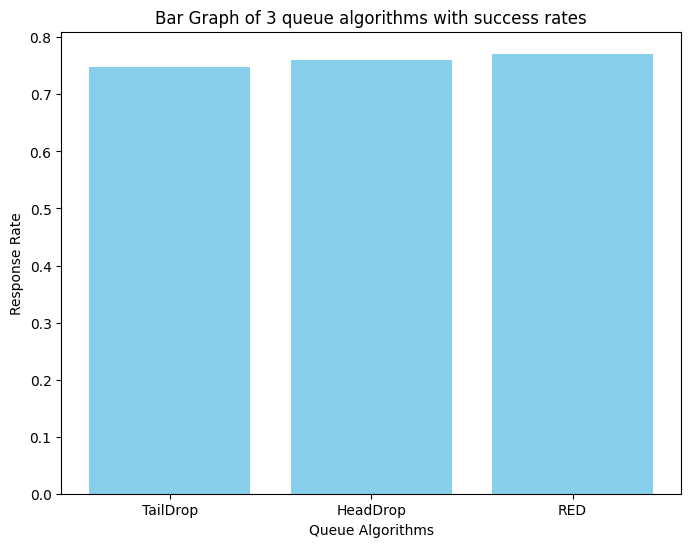

In [77]:
# Define data for the bar graph (three points and their corresponding values)
points = ['TailDrop', 'HeadDrop', 'RED']
values = [tail_drop_success_rate2, head_drop_success_rate2, red_success_rate2]  # Corresponding values for each point

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

# Create the bar chart
plt.bar(points, values, color='skyblue')

# Add labels and title
plt.xlabel('Queue Algorithms')  # Label for x-axis
plt.ylabel('Response Rate')  # Label for y-axis
plt.title('Bar Graph of 3 queue algorithms with success rates')  # Title of the graph

# Display the bar graph
plt.show()

**Now we want to check the diffrence with queue with bigger sizes, we will change the size to 100 for each queue**

Running the simulation with TailDrop Queue

In [85]:
requests_arrival_rate = 0.9
time_to_run = 1.0

queue = TailDrop()
queue.set_max_size(100)
tail_drop_success_rate3 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {tail_drop_success_rate3:.2%}")

request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request faile

Running the simulation with HeadDrop Queue

In [84]:
requests_arrival_rate = 0.9
time_to_run = 1.0

queue = HeadDrop()
queue.set_max_size(100)

head_drop_success_rate3 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {head_drop_success_rate3:.2%}")

maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
maxed queue, oldest request dropped!
m

Running the simulation with RED Queue

In [86]:
class RED2:
    def __init__(self):
        self.queue = []
        self.max_size = 100
        self.min_threshold = 30
        self.max_threshold = 80
        self.drop_probability = 0.5

    def enqueue(self, request):
        if len(self.queue) > self.max_size:
            print("maxed queue request dropped!")
        else:
            queue_len = len(self.queue)
            if queue_len < self.min_threshold:
                self.queue.append(request)
            elif queue_len >= self.max_threshold:
                print("request dropped by len bigger the threashold")
                return
            else:
                # drop requests randomly by probability
                if random.uniform(0, 1) < self.drop_probability:
                    print("request dropped by probability!")
                else:
                    self.queue.append(request)
    def set_max_size(self,size):
      self.max_size = size
    def dequeue(self):
        if not self.is_empty():
            return self.queue.pop(0)
        return None

    def is_empty(self):
        return len(self.queue) == 0

requests_arrival_rate = 0.9
time_to_run = 1.0

queue = RED2()

red_success_rate3 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {red_success_rate3:.2%}")

request dropped by probability!
request dropped by probability!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request dropped by probability!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request dropped by probability!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request dropped by probability!
request failed to process before the deadline!
request dropped by probability!
request failed to process before the deadline!
request failed to process before the deadline!
request d

**Displaying the Graph**

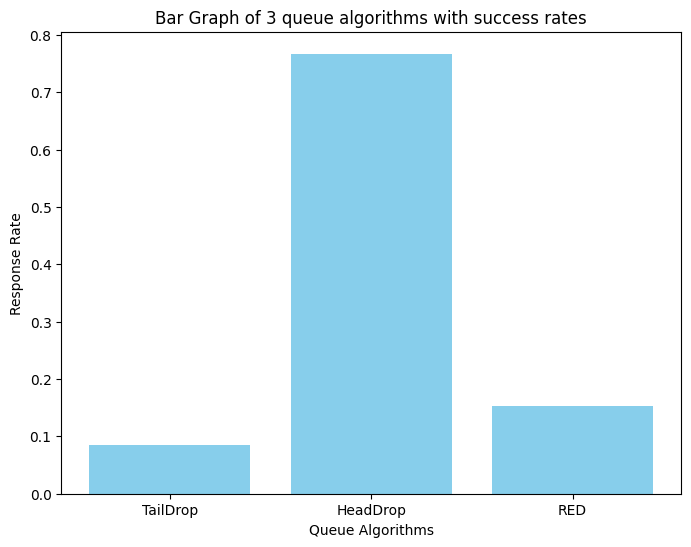

In [87]:
# Define data for the bar graph (three points and their corresponding values)
points = ['TailDrop', 'HeadDrop', 'RED']
values = [tail_drop_success_rate3, head_drop_success_rate3, red_success_rate3]  # Corresponding values for each point

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

# Create the bar chart
plt.bar(points, values, color='skyblue')

# Add labels and title
plt.xlabel('Queue Algorithms')  # Label for x-axis
plt.ylabel('Response Rate')  # Label for y-axis
plt.title('Bar Graph of 3 queue algorithms with success rates')  # Title of the graph

# Display the bar graph
plt.show()

**Now we want to check the diffrence with smaller and average requests arrived per ms with same queue size of 100**

Running the simulation with TailDrop Queue

In [89]:
requests_arrival_rate = 0.7
time_to_run = 1.0

queue = TailDrop()
queue.set_max_size(100)
tail_drop_success_rate4 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {tail_drop_success_rate4:.2%}")

request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request faile

Running the simulation with HeadDrop Queue

In [91]:
requests_arrival_rate = 0.7
time_to_run = 1.0

queue = HeadDrop()
queue.set_max_size(100)

head_drop_success_rate4 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {head_drop_success_rate4:.2%}")

request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request failed to process before the deadline!
request faile

Running the simulation with RED Queue

In [93]:
requests_arrival_rate = 0.7
time_to_run = 1.0

queue = RED2()

red_success_rate4 = Simulation(requests_arrival_rate, queue, time_to_run)

# Output results
print(f"Success Rate: {red_success_rate4:.2%}")

Success Rate: 99.26%


**Displaying the Graph**

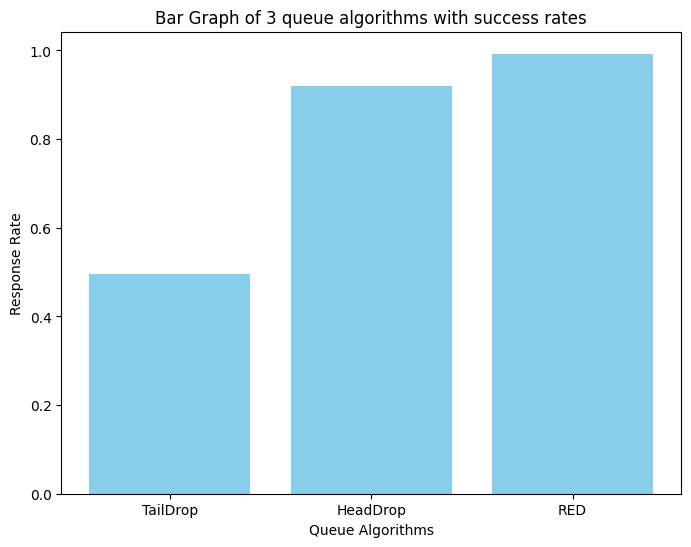

In [94]:
# Define data for the bar graph (three points and their corresponding values)
points = ['TailDrop', 'HeadDrop', 'RED']
values = [tail_drop_success_rate4, head_drop_success_rate4, red_success_rate4]  # Corresponding values for each point

# Plotting the bar graph
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

# Create the bar chart
plt.bar(points, values, color='skyblue')

# Add labels and title
plt.xlabel('Queue Algorithms')  # Label for x-axis
plt.ylabel('Response Rate')  # Label for y-axis
plt.title('Bar Graph of 3 queue algorithms with success rates')  # Title of the graph

# Display the bar graph
plt.show()

# Conclusions




**Do queue size effect the result?**
Yes, for the 3 algorithms increasing the size will increase the response rate.

**what about diffrent arrival rates?**
in small arrival rates the algorithms on average behave the same, in average arrival rates Red is the best algorithm, and on the big arrival rates HeadDrop is the best

**which queue algorithm peforms best? and why?**
HeadDrop is the algorithm that peforms the best on avg on all diffrent cases of diffrent arrival times and diffrent queue sizes, TailDrop rejects an
incoming packet when the queue is full, while HeadDrop
drops the **oldest packet** in the queue.RED randomly
discards packets with a probability that depends on the queue
length. the main reason HeadDrop is better than TailDrop and RED because HeadDrop drops the oldest query when the queue is
full, and by that behaviour it avoides timeouts.

**How the result relate to the ones presented in the paper?**





We can see on page 6, "we observe that all the schemes drop in the response rate. Yet,
HeadDrop and QART behave better than the alternatives", "TailDrop and RED reach
a certain queue length and drop new queries without even
enqueuing them." and also "HeadDrop drops the oldest query when the queue is
full, thus avoiding timeouts."


---
although we didn't evaluate QART algorithm in this experement, we reached the same conclusions in the paper related for HeadDrop algorithm beeing the best of the alternatives which include the TailDrop and RED algorithms.

**Did we find the same queue policies most affictive?**



Yes we Found the same queue policies most affivtive regarding the algorithms that was evaluated in this experiment (TailDrop, HeadDrop, RED), we would prefer the HeadDrop queue algorithm in case of a big requests arrival rate out of the three algorithms.  